In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
%matplotlib inline

In [2]:
allocs = pd.Series([.3, .3, .35, .05, 1], index=['ES','NQ', 'GC', 'CL', 'total'])
#allocs = pd.Series([2/3, 1/3, 1], index=['ES','NQ', 'total'])
cash = 100000

In [3]:
df = pd.read_csv('/home/tomek/ib_tools/backtests/backtest_2020-05-13_18-14_20190101_20190131.csv')
del df['sys_time']
del df['exec_ids']
try:
    del df['perm_id']
    del df['com_reports']
except:
    pass
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])

In [4]:
df.groupby('contract').realizedPNL.sum()

contract
CL   -2170.64
ES   -1367.00
GC   -1003.64
NQ    -600.00
Name: realizedPNL, dtype: float64

In [5]:
df.realizedPNL.sum()

-5141.28

In [32]:
df[df['contract'] == 'NQ'].head(50)

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2019-01-02 09:22:00,NQ,SELL,1,6192.25,5,ENTRY,2.1,0.0,100035.16
2019-01-02 10:17:00,NQ,BUY,1,6189.00,6,STOP-LOSS,2.1,60.8,100095.96
2019-01-02 19:09:00,NQ,BUY,1,6392.00,13,ENTRY,2.1,0.0,99926.90
2019-01-02 20:08:00,NQ,SELL,1,6376.50,14,STOP-LOSS,2.1,-314.2,99612.70
2019-01-03 06:19:00,NQ,SELL,1,6214.25,19,ENTRY,2.1,0.0,99523.02
2019-01-03 08:00:00,NQ,BUY,1,6221.25,20,STOP-LOSS,2.1,-144.2,99378.82
2019-01-03 09:30:00,NQ,SELL,1,6212.00,23,ENTRY,2.1,0.0,99413.98
2019-01-03 13:02:00,NQ,BUY,1,6221.75,24,STOP-LOSS,2.1,-199.2,99214.78
2019-01-03 16:17:00,NQ,SELL,1,6191.75,25,ENTRY,2.1,0.0,99214.78


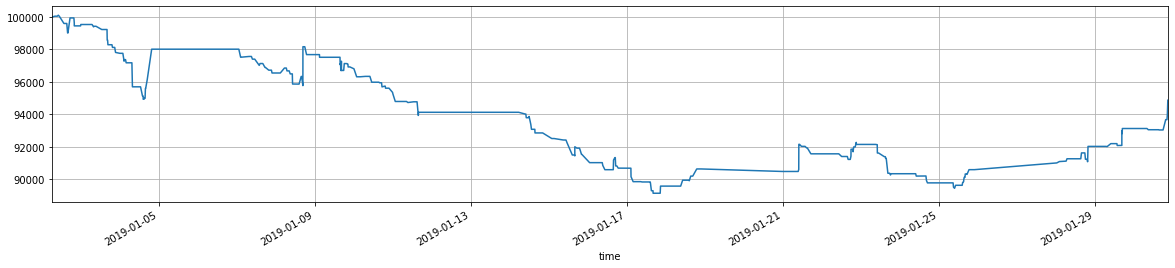

In [6]:
df.cash.plot(figsize=(20,4), grid=True);

In [7]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [8]:
df

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2019-01-02 06:19:00,GC,BUY,1,1287.10,1,ENTRY,2.42,0.00,100000.00
2019-01-02 07:01:00,CL,SELL,1,44.71,3,ENTRY,2.37,0.00,100000.00
2019-01-02 08:13:00,GC,SELL,1,1287.50,2,STOP-LOSS,2.42,35.16,100035.16
2019-01-02 09:22:00,NQ,SELL,1,6192.25,5,ENTRY,2.10,0.00,100035.16
2019-01-02 09:43:00,GC,BUY,1,1289.70,7,ENTRY,2.42,0.00,100035.16
...,...,...,...,...,...,...,...,...,...
2019-01-30 19:49:00,NQ,SELL,1,6741.50,332,STOP-LOSS,2.10,50.80,93662.76
2019-01-30 20:03:00,NQ,BUY,1,6769.25,333,ENTRY,2.10,0.00,93662.76
2019-01-30 20:36:00,GC,BUY,1,1324.10,335,ENTRY,2.42,0.00,93662.76


In [9]:
df[(df['contract'] == 'GC')]

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2019-01-02 06:19:00,GC,BUY,1,1287.1,1,ENTRY,2.42,0.00,100000.00
2019-01-02 08:13:00,GC,SELL,1,1287.5,2,STOP-LOSS,2.42,35.16,100035.16
2019-01-02 09:43:00,GC,BUY,1,1289.7,7,ENTRY,2.42,0.00,100035.16
2019-01-02 10:56:00,GC,SELL,1,1289.1,8,STOP-LOSS,2.42,-64.84,100031.12
2019-01-02 19:54:00,GC,SELL,1,1280.8,15,ENTRY,2.42,0.00,99926.90
...,...,...,...,...,...,...,...,...,...
2019-01-29 17:02:00,GC,SELL,1,1314.4,320,STOP-LOSS,2.42,-164.84,92804.94
2019-01-30 08:16:00,GC,BUY,1,1318.4,325,ENTRY,2.42,0.00,93115.74
2019-01-30 09:06:00,GC,SELL,1,1317.7,326,STOP-LOSS,2.42,-74.84,93040.90


In [29]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 CL     72
 ES     21
 GC    142
 NQ    100
 Name: action, dtype: int64, 335)

In [11]:
# commission paid
df.groupby('contract').commission.sum()

contract
CL    170.64
ES     44.10
GC    343.64
NQ    210.00
Name: commission, dtype: float64

In [12]:
df.commission.sum()

768.38

In [13]:
# per trade stats
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss','win_ratio', 'EV',
                               'number_of_positions'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    row['average_PNL'] = round(d.realizedPNL.mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0]).realizedPNL.mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0]).realizedPNL.mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_positions'] = d.realizedPNL.count()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV,number_of_positions
GC,0.38,-14.14,141.46,-109.61,1.29,-14.20,71.0
NQ,0.38,-12.00,408.69,-269.85,1.51,-12.00,50.0
CL,0.36,-60.30,506.80,-380.83,1.33,-61.28,36.0
ES,0.40,-136.70,780.18,-747.95,1.04,-136.70,10.0
total,0.38,-30.79,337.99,-254.18,1.33,-29.16,167.0


In [14]:
daily = by_contract.resample('B').sum()
daily = daily.cumsum() +  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [15]:
# instrument correlations
log_returns = np.log(daily.pct_change()[1:] + 1)
log_returns.corr()

,CL,ES,GC,NQ,total
CL,1.000000,0.026992,0.294274,0.048904,0.600811
ES,0.026992,1.000000,-0.038777,-0.013552,0.429294
GC,0.294274,-0.038777,1.000000,0.343599,0.469765
NQ,0.048904,-0.013552,0.343599,1.000000,0.599638
total,0.600811,0.429294,0.469765,0.599638,1.000000


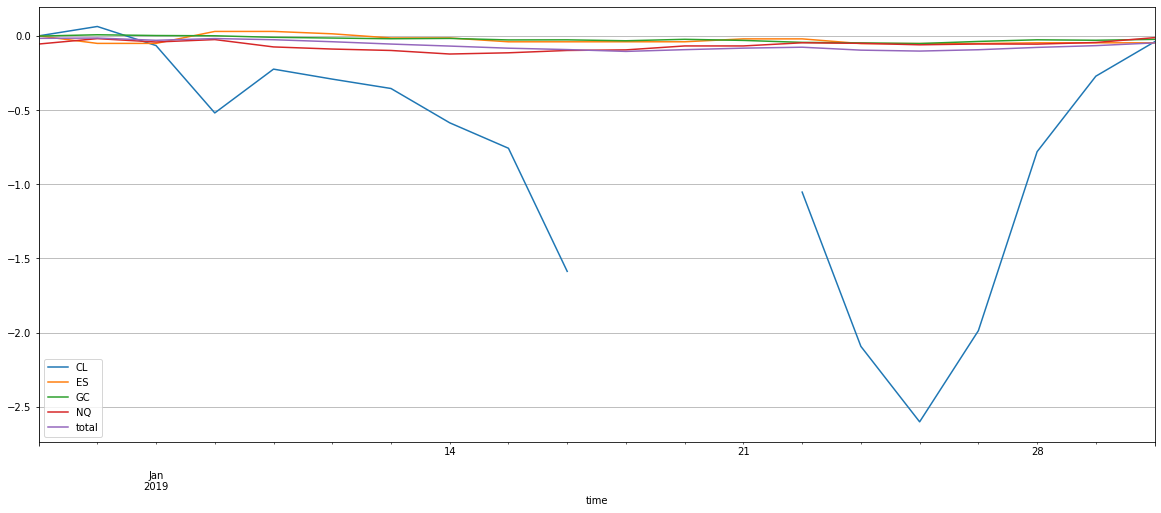

In [16]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

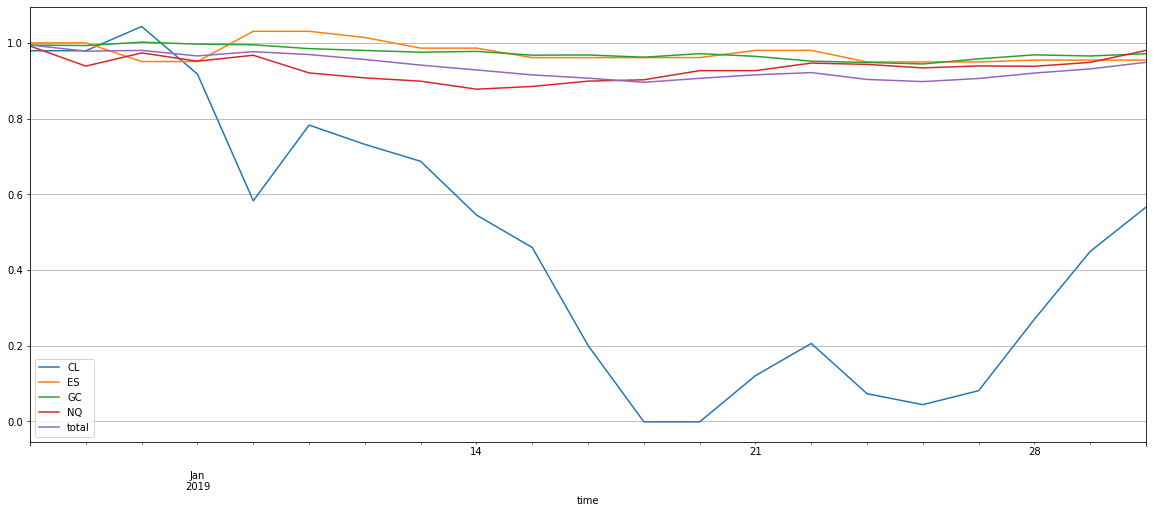

In [17]:
returns = daily.pct_change()
returns.iloc[0] = (daily.iloc[0] / (allocs * cash))-1
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [18]:
stats = pd.DataFrame()
for col in returns.columns:
    stats[col] = perf_stats(returns[col])
stats

,CL,ES,GC,NQ,total
Annual return,-0.998922,-0.428591,-0.294702,-0.215283,-0.469205
Cumulative returns,-0.434128,-0.045567,-0.028675,-0.020000,-0.051413
Annual volatility,249.328175,0.396350,0.119523,0.375094,0.200211
Sharpe ratio,-3.379160,-1.225798,-2.862229,-0.465615,-3.064228
Calmar ratio,-0.997297,-5.454257,-5.132335,-1.757415,-4.497554
Stability,NaN,0.339413,0.666795,0.000755,0.538353
Max drawdown,-1.001630,-0.078579,-0.057421,-0.122500,-0.104324
Omega ratio,0.069335,0.729267,0.650639,0.925257,0.656651
Sortino ratio,-3.385467,-1.969454,-3.944336,-0.614281,-3.909090
Skew,-4.235064,1.583204,0.605202,-0.558985,0.274796


In [19]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,CL,ES,GC,NQ,total
time,,,,,
2019-01-31,-3.91,-4.56,-2.3,-1.17,-4.61


In [20]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

CL      -4.0
ES      -5.0
GC      -2.0
NQ      -1.0
total   -5.0
dtype: float64

In [21]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2019-01-08 16:51:00,ES,SELL,2550.50,2395.80
2019-01-04 19:46:00,NQ,SELL,6431.50,1895.80
2019-01-21 10:01:00,CL,SELL,53.76,975.26
2019-01-28 20:00:00,CL,BUY,51.85,945.26
2019-01-02 17:31:00,CL,SELL,47.06,925.26
...,...,...,...,...
2019-01-03 16:24:00,NQ,BUY,6224.00,-649.20
2019-01-15 14:37:00,ES,SELL,2580.25,-754.20
2019-01-11 15:52:00,ES,SELL,2577.50,-841.70
